In [1]:
#Importing libraries
%matplotlib inline
from IPython.display import display, Math

import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
#Reading image
original_image = cv2.imread('contrast_OCR.jpg')
#original_image = cv2.resize(original_image, (600, 700))

# display the image
cv2.imshow('Original image',original_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
#Converting image to HSV format
hsv_image=cv2.cvtColor(original_image,cv2.COLOR_RGB2GRAY)

# display the image
cv2.imshow('Binarized image',hsv_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
#Converting image to HSV format
hsv_image=cv2.cvtColor(original_image,cv2.COLOR_RGB2HSV)

# display the image
cv2.imshow('HSV image',hsv_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
# convert HSV image into a numpy array
img = np.asarray(hsv_image)

(array([4.000000e+00, 5.200000e+01, 1.480000e+02, 1.790000e+02,
        6.740000e+02, 9.220900e+04, 7.283580e+05, 5.310330e+05,
        2.797000e+05, 1.956510e+05, 9.923000e+04, 6.177800e+04,
        3.274100e+04, 4.127400e+04, 3.958300e+04, 3.839500e+04,
        4.050700e+04, 4.462400e+04, 5.057570e+05, 1.388009e+06,
        3.871870e+05, 4.539600e+04, 4.859700e+04, 5.068000e+04,
        3.805400e+04, 5.103700e+04, 4.707700e+04, 5.233900e+04,
        5.815600e+04, 5.655800e+04, 5.658200e+04, 6.661700e+04,
        6.913400e+04, 7.273400e+04, 9.638500e+04, 1.231860e+05,
        1.404160e+05, 2.012020e+05, 4.204740e+05, 3.085220e+05,
        4.350500e+04, 5.010000e+02, 1.250000e+02, 8.100000e+01,
        6.000000e+01, 7.400000e+01, 6.800000e+01, 9.000000e+00,
        2.600000e+01, 1.920000e+02]),
 array([  9.  ,  13.92,  18.84,  23.76,  28.68,  33.6 ,  38.52,  43.44,
         48.36,  53.28,  58.2 ,  63.12,  68.04,  72.96,  77.88,  82.8 ,
         87.72,  92.64,  97.56, 102.48, 107.4 , 11

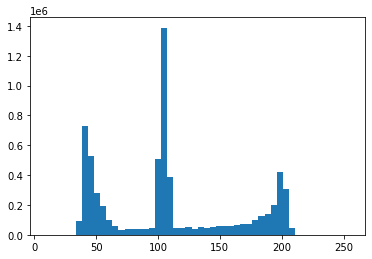

In [10]:
# put pixels in a 1D array by flattening out img array
flat = img.flatten()

# show the histogram
plt.hist(flat, bins=50)

In [38]:
# formula for creating the histogram
display(Math(r'P_x(j) = \sum_{i=0}^{j} P_x(i)'))

<IPython.core.display.Math object>

In [8]:
# create histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

hist = get_histogram(flat, 256)

plt.plot(hist)

IndexError: index 255 is out of bounds for axis 0 with size 236

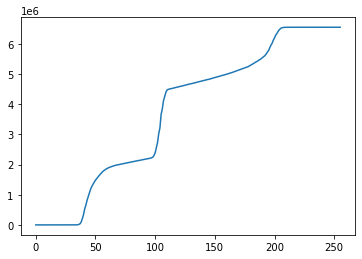

In [40]:
# create cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

In [21]:
# formula to calculate cumulation sum
display(Math(r's_k = \sum_{j=0}^{k} {\frac{n_j}{N}}'))

<IPython.core.display.Math object>

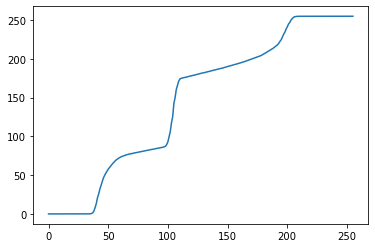

In [41]:
# re-normalize cumsum values to be between 0-255

# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cdf
cs = nj / N

plt.plot(cs)

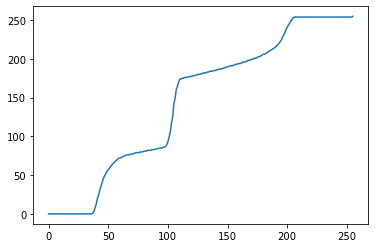

In [51]:
# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

(array([ 93266., 116238., 132044., 196106., 122442.,      0., 161528.,
        121053., 127787., 208184., 138134., 164630., 136783., 109813.,
        149649., 124957., 123526.,  75466.,  90494., 172784., 167013.,
             0., 293092.,      0., 192712.,      0.,      0., 448952.,
             0., 182655.,      0., 270598., 142413., 133251., 205516.,
        118390., 133241., 122888., 133167., 129327., 156509., 123140.,
         97382., 166113.,  86555., 157744., 102429., 164164., 125234.,
        137511.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer object of 50 artists>)

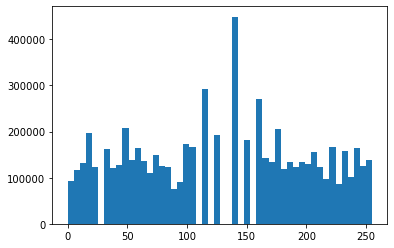

In [52]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# we see a much more evenly distributed histogram
plt.hist(img_new, bins=50)

In [53]:
# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)
img_new

array([[[117,  36, 251],
        [117,  36, 251],
        [106,  46, 251],
        ...,
        [142,  46, 208],
        [125,  41, 211],
        [142,  41, 214]],

       [[117,  36, 251],
        [117,  36, 251],
        [106,  46, 251],
        ...,
        [125,  46, 209],
        [125,  41, 210],
        [125,  41, 211]],

       [[117,  36, 251],
        [117,  36, 251],
        [106,  46, 251],
        ...,
        [125,  41, 210],
        [125,  46, 209],
        [142,  46, 208]],

       ...,

       [[ 86,  82, 182],
        [ 87,  80, 183],
        [ 87,  79, 183],
        ...,
        [149, 175,  80],
        [149, 176,  79],
        [142, 174,  80]],

       [[ 86,  82, 182],
        [ 87,  80, 183],
        [ 89,  79, 184],
        ...,
        [142, 175,  81],
        [142, 174,  80],
        [149, 175,  80]],

       [[ 86,  82, 183],
        [ 87,  82, 184],
        [ 89,  79, 184],
        ...,
        [142, 174,  81],
        [142, 175,  81],
        [142, 175,  81]]

In [57]:
#Displaying image after Histogram equalization
HE_fin = cv2.cvtColor(img_new, cv2.COLOR_HSV2RGB)
cv2.imshow('After Histogram equalization',HE_fin)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [60]:
#Contrast Limited Adaptive Histogram Equalization
#Creating CLAHE 
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(29,29))
#Binarizing image
bin_image=cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)
#Apply CLAHE to the original image
CLAHE_fin = clahe.apply(bin_image)
cv2.imshow('After CLAHE Histogram equalization',CLAHE_fin)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [63]:
#Importing Pytesseract OCR engine
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

#Reading and binarizing image
img = cv2.imread('contrast_OCR.jpg')
ret, binar_image = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)

#Performing OCR
text = pytesseract.image_to_string(binar_image)
print(text)

29

Ties a woman said, Speak to us of Joy
and Sorrow.

And he answered:

Your joy is your sorrow unmasked.

And the selfsame well from which your
laughter rises was oftentimes filled with your
tears.

And how else can it be?

The deeper that sorrow carves into your
being, the more joy you can contain.

Is not the cup that holds your wine the very
cup that was burned in the potter’s oven?

And is not the lute that soothes your
spirit, the very wood that was hollowed
with knives?

When you are joyous, look deep into
your heart and you shall find it is only that
which has given you sorrow that is giving
you joy.

When you are sorrowful look again in
your heart, and you shall see. that in truth
you are weeping for that which has.
your delight.




In [65]:
#Binarizing Histogram equalized image
ret, binar = cv2.threshold(HE_fin,120, 255, cv2.THRESH_BINARY)
#Performing OCR
text = pytesseract.image_to_string(binar) 
print(text)

rT
Dus aewoman said, Speak tou. of Jon
and Sorrow,

And he answered:

Your jov is vour sorrow unmasked.

And the seltsame well from which

laughter rises was oftentimes filled with vou:
tears.

And how else can it be?

The deeper that sorrow carves into vour
being, the more joy you can contain.

Ts not the cup that holds your wine the very
cup that was burned in the potter's os en?

And is not the lute that soothes vour
spirit, the very wood that was hollowed
with knives?

When you are joyous, look deep into
your heart and you shall find it is only that
which has given you sorrow that is giving
you joy.

When you are sorrowful look again in
your heart, and you shall see that in truth
you are weeping for that which has been
your delight.




In [66]:
#Binarizing CLAHE image
ret, bin = cv2.threshold(CLAHE_fin, 120, 255, cv2.THRESH_BINARY)
#Performing OCR
text = pytesseract.image_to_string(bin)
print(text)

29

Then a woman said, Speak to us of Joy
and Sorrow.

And he answered:

Your joy is your sorrow unmasked.

And the selfsame well from which your
laughter rises was oftentimes filled with your
tears.

And how else can it be?

The deeper that sorrow carves into your
being, the more joy you can contain.

Is not the cup that holds your wine the very
cup that was burned in the potter’s oven?

And is not the lute that soothes your
spirit, the very wood that was hollowed
with knives?

When you are joyous, look deep into
your heart and you shall find it is only that
which has given you sorrow that is giving
you joy.

When you are sorrowful look again in
your heart, and you shall see that in truth
you are weeping for that which has been
your delight.


